# 1. Pandas Datareader Test

In [3]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import argparse
from copy import deepcopy # Add Deepcopy for args
from sklearn.metrics import mean_absolute_error

import seaborn as sns 
import matplotlib.pyplot as plt

print(torch.__version__)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

1.7.1
Populating the interactive namespace from numpy and matplotlib


In [18]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-12-01,2500.0,2420.0,2495.0,2500.0,222800.0,1927.813110
2000-12-04,2560.0,2450.0,2500.0,2470.0,196100.0,1904.679199
2000-12-05,2500.0,2455.0,2455.0,2485.0,158800.0,1916.245728
2000-12-06,2580.0,2490.0,2530.0,2490.0,287600.0,1920.101562
2000-12-07,2490.0,2455.0,2470.0,2465.0,147900.0,1900.823608
...,...,...,...,...,...,...
2021-03-29,14100.0,13750.0,13800.0,13950.0,3539895.0,13950.000000
2021-03-30,14300.0,13900.0,14100.0,14100.0,2490522.0,14100.000000
2021-03-31,14450.0,14000.0,14250.0,14000.0,3024188.0,14000.000000


In [4]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = (2000, 12, 1)
start = datetime.datetime(*start)
end = datetime.date.today()

google = pdr.DataReader('028050.KS', 'yahoo', start, end)

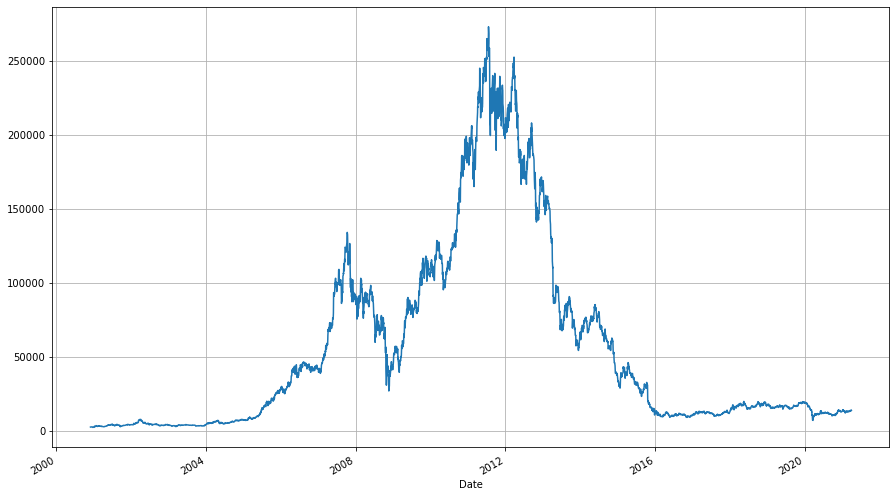

In [6]:
google.Low.plot(grid=True);

In [70]:
class dummySet(Dataset):
    
    def __init__(self, num_data):
        self.x = np.array(list(range(num_data*2))).reshape(-1, 2)
        self.y = np.array(list(range(num_data)))
        self.z = np.array(list(range(num_data)))
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx], self.z[idx]

In [71]:
dataset = dummySet(100)

In [72]:
print(dataset[0])

(array([0, 1]), 0, 0)


In [78]:
dataloader = DataLoader(dataset, 3, shuffle=True)

In [81]:
for batch in dataloader:
    x = batch[0]
    y = batch[1]
    z = batch[2]
    print(x)

tensor([[ 16,  17],
        [124, 125],
        [ 62,  63]], dtype=torch.int32)
tensor([[ 36,  37],
        [192, 193],
        [ 64,  65]], dtype=torch.int32)
tensor([[ 88,  89],
        [ 42,  43],
        [148, 149]], dtype=torch.int32)
tensor([[ 74,  75],
        [168, 169],
        [116, 117]], dtype=torch.int32)
tensor([[ 96,  97],
        [ 14,  15],
        [196, 197]], dtype=torch.int32)
tensor([[ 20,  21],
        [190, 191],
        [ 76,  77]], dtype=torch.int32)
tensor([[132, 133],
        [ 86,  87],
        [ 98,  99]], dtype=torch.int32)
tensor([[ 48,  49],
        [ 34,  35],
        [128, 129]], dtype=torch.int32)
tensor([[104, 105],
        [150, 151],
        [ 50,  51]], dtype=torch.int32)
tensor([[152, 153],
        [ 58,  59],
        [122, 123]], dtype=torch.int32)
tensor([[142, 143],
        [146, 147],
        [110, 111]], dtype=torch.int32)
tensor([[130, 131],
        [ 22,  23],
        [198, 199]], dtype=torch.int32)
tensor([[ 26,  27],
        [188, 189],


In [22]:
num_data = 10
np.array(list(range(num_data*2))).reshape(-1, 2)
np.array(list(range(num_data)))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])